<a href="https://colab.research.google.com/github/Epistimonas/imagenes/blob/master/Copia_de_lesson4_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow_hub as hub
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt
from keras.datasets import mnist

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

7


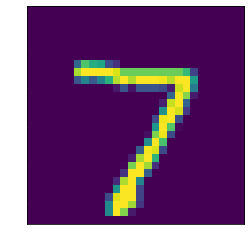

In [0]:
plt.imshow(X_test[0])
print(y_test[0])


5


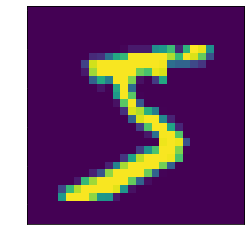

In [0]:
plt.imshow(X_train[0])
print(y_train[0])

In [0]:
N_train = np.zeros(shape=(100,128,128))
L_train = np.zeros(shape=(100,))
N_test = np.zeros(shape=(50,128,128))
L_test = np.zeros(shape=(50,))

In [0]:
tno=os.listdir('drive/My Drive/train/no_finding');
tfi=os.listdir('drive/My Drive/train/infiltration');
vno=os.listdir('drive/My Drive/validation/no_finding');
vfi=os.listdir('drive/My Drive/validation/infiltration');
print(len(vfi))

50


In [0]:
for x in range(100):
  i=random.randint(0, 1)
  aux=random.randint(0,49)
  if(i):
    im = Image.open(os.path.join("drive/My Drive/train/no_finding", tno[aux]))
    im2arr = np.array(im)
    N_train[x]=im2arr
    L_train[x]=0
  else:
    im = Image.open(os.path.join("drive/My Drive/train/infiltration",tfi[aux]))
    im2arr = np.array(im)
    N_train[x]=im2arr
    L_train[x]=1


In [0]:
for x in range(49):
  i=random.randint(0, 1)
  aux=random.randint(0,49)
  if(i):
    im = Image.open(os.path.join("drive/My Drive/validation/no_finding", vno[aux]))
    im2arr = np.array(im)
    N_test[x]=im2arr
    L_test[x]=0
  else:
    im = Image.open(os.path.join("drive/My Drive/validation/infiltration",vfi[aux]))
    im2arr = np.array(im)
    N_test[x]=im2arr
    L_test[x]=1

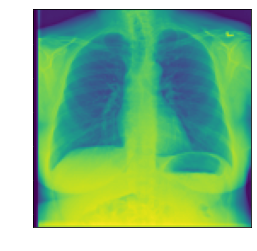

In [0]:
im = Image.open(os.path.join("drive/My Drive/validation/no_finding", var[0]))
im2 = Image.open(os.path.join("drive/My Drive/validation/no_finding", var[1]))

im2arr = np.array(im) # im2arr.shape: height x width x channel
im2arr2 = np.array(im2)
arr2im = Image.fromarray(im2arr)
a[0]=im2arr
a[1]=im2arr2
plt.imshow(a[3])


In [0]:
print(N_train.shape)
print(Y_train.shape)
print(N_test.shape)
print(Y_test.shape)

(100, 128, 128)


NameError: ignored

In [0]:
N_train = N_train.reshape(100,128,128,1)
N_test = N_test.reshape(50,128,128,1)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
L_train = to_categorical(L_train)
L_test = to_categorical(L_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
MaxPooling2D(),
model.add(Flatten())
Dropout(0.5),
model.add(Dense(2, activation='softmax'))




In [0]:
  #compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#train the model
model.fit(N_train, L_train, validation_data=(N_test, L_test), epochs=15)

Epoch 1/15
4/4 [==============================] - 2s 400ms/step - loss: 12.6890 - accuracy: 0.5300 - val_loss: 0.8715 - val_accuracy: 0.5800
Epoch 2/15
4/4 [==============================] - 1s 374ms/step - loss: 0.9985 - accuracy: 0.4800 - val_loss: 0.8171 - val_accuracy: 0.4800
Epoch 3/15
4/4 [==============================] - 1s 372ms/step - loss: 0.8909 - accuracy: 0.5200 - val_loss: 0.9125 - val_accuracy: 0.5400
Epoch 4/15
4/4 [==============================] - 1s 374ms/step - loss: 0.6673 - accuracy: 0.6400 - val_loss: 0.8675 - val_accuracy: 0.5800
Epoch 5/15
4/4 [==============================] - 1s 371ms/step - loss: 0.7423 - accuracy: 0.6200 - val_loss: 0.9099 - val_accuracy: 0.5600
Epoch 6/15
4/4 [==============================] - 1s 371ms/step - loss: 0.8247 - accuracy: 0.4800 - val_loss: 0.7644 - val_accuracy: 0.5400
Epoch 7/15
4/4 [==============================] - 2s 381ms/step - loss: 0.6576 - accuracy: 0.6100 - val_loss: 0.7613 - val_accuracy: 0.5400
Epoch 8/15
4/4 [===

In [0]:
model.predict(N_test[:4])

array([[0.8911835 , 0.1088165 ],
       [0.24999996, 0.75000006],
       [0.05076857, 0.94923145],
       [0.2854162 , 0.7145838 ]], dtype=float32)

In [0]:
L_test[:4]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [0]:
train_dir = 'drive/My Drive/train/'
validation_dir = 'drive/My Drive/validation/'

train_no_dir = 'drive/My Drive/train/no_finding'
train_f_dir = 'drive/My Drive/train/infiltration'
validation_no_dir = 'drive/My Drive/validation/no_finding'
validation_f_dir = 'drive/My Drive/validation/infiltration' 

In [0]:
num_no_tr = len(os.listdir(train_no_dir))
num_f_tr = len(os.listdir(train_f_dir))

num_no_val = len(os.listdir(validation_no_dir))
num_f_val = len(os.listdir(validation_f_dir))

total_train = num_no_tr + num_f_tr
total_val = num_no_val + num_f_val

print('total training cat images:', num_no_tr)
print('total training dog images:', num_f_tr)

print('total validation cat images:', num_no_val)
print('total validation dog images:', num_f_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 50
total training dog images: 50
total validation cat images: 50
total validation dog images: 51
Total training images: 100
Total validation images: 101


In [0]:
for x in range(100):
  

In [0]:
epochs = 15
batch_size = 128
IMAGE_SIZE = (128, 128)
CLASS_NAMES = ['no_finding','infiltration',"saber"]

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_dir

'drive/My Drive/train/'

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 100 images belonging to 3 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 100 images belonging to 3 classes.


In [0]:
training_batch, labels_batch = next(train_data_gen)
training_batch.shape, labels_batch.shape

((100, 128, 128, 3), (100,))

In [0]:
def plot_images(img_batch, labels=None):
  range_count = 15 if len(img_batch) > 15 else len(img_batch)
  plt.figure(figsize=(12,12))
  for i in range(range_count):
    plt.subplot(4,5,i+1) 
    plt.imshow(img_batch[i])
    print(img_batch[i])
    if (labels is not None):
      plt.title(CLASS_NAMES[np.int(labels[i])]) 
    plt.axis('off')

array([1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2.,
       1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1.,
       2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1.,
       2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1.],
      dtype=float32)

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.82745105 0.82745105 0.82745105]
  [0.909804   0.909804   0.909804  ]
  [0.90196085 0.90196085 0.90196085]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.8352942  0.8352942  0.8352942 ]
  [0.909804   0.909804   0.909804  ]


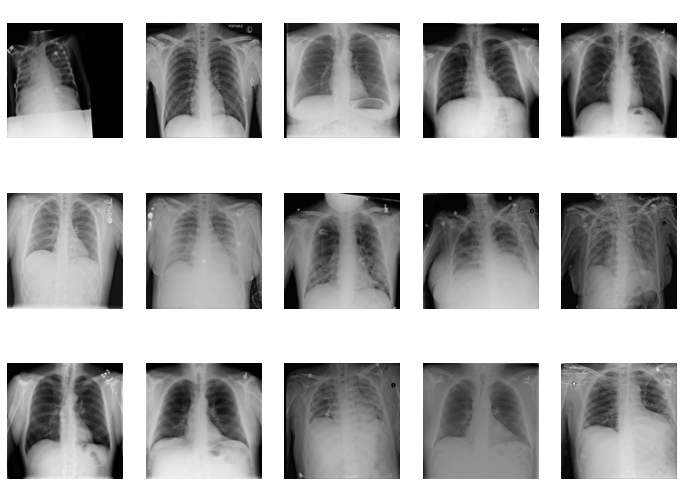

In [0]:
plot_images(training_batch, labels_batch)

#Fully connected neural netowrk

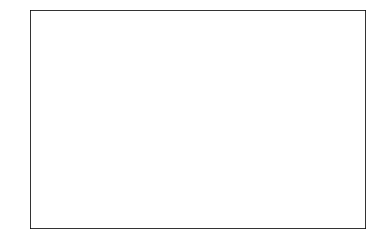

In [0]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

def train(m, train_data=train_data_gen, epochs=epochs):
  return m.fit(
            train_data,
            steps_per_epoch=total_train // batch_size,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_val // batch_size
          )

In [0]:
model = Sequential([
  Flatten(input_shape=IMAGE_SIZE+(3,)),
  Dense(1024, activation='tanh'),
  Dense(512, activation='tanh'),
  Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              69121024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 69,646,337
Trainable params: 69,646,337
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = train(model)
plot_accuracy_and_loss(history)

Epoch 1/15


UnboundLocalError: ignored

#ConvNet

##Convolution

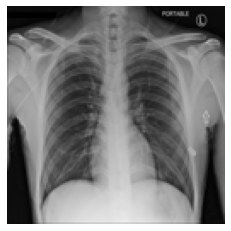

In [0]:
img = training_batch[1]
plt.axis('off')
plt.imshow(img)


In [0]:
def plot_filters(layer):
    filters = layer.shape[3]

    columns = 8
    #rows = ((filters-1) // columns) + 1
    plt.figure(figsize=(20,20))    
    for i in range(filters):
      plt.subplot(columns, columns, i+1)
      plt.title('Filter ' + str(i), color='white')
      plt.axis('off')
      plt.imshow(layer[0,:,:,i], interpolation="nearest", cmap="gray")

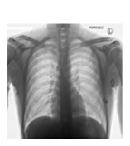

In [0]:
conv = Conv2D(1, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

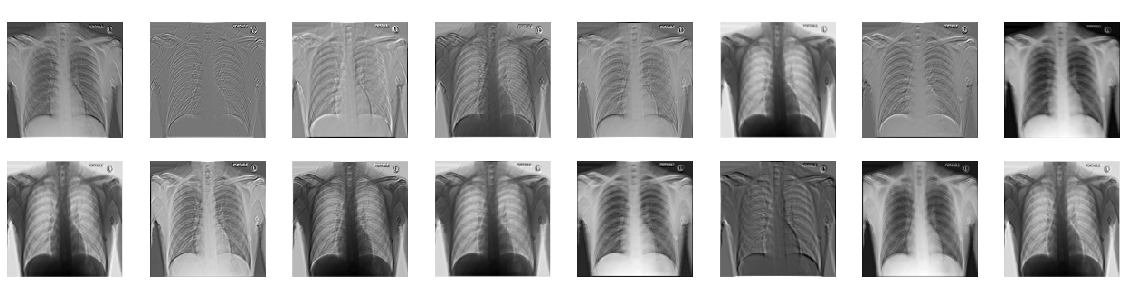

In [0]:
conv = Conv2D(16, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

##ConvModel

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)            

In [0]:
def plot_model_filters(layers, img):
  input = tf.expand_dims(img, 0)
  for filter_layer in layers:
    output = filter_layer(input)    
    input = output
    print(filter_layer)
    plot_filters(output.numpy())
  return


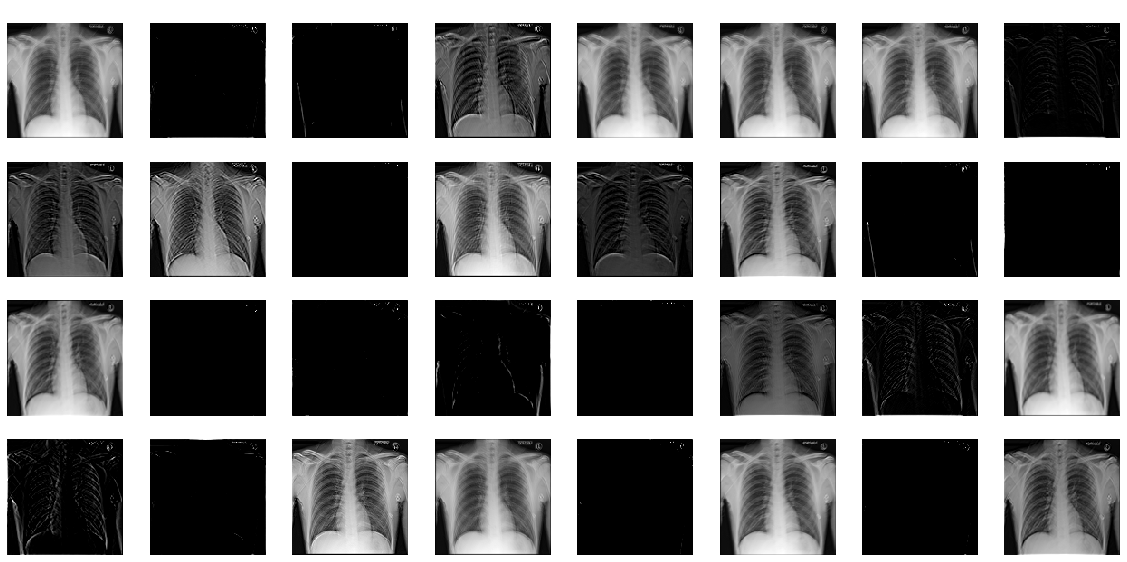

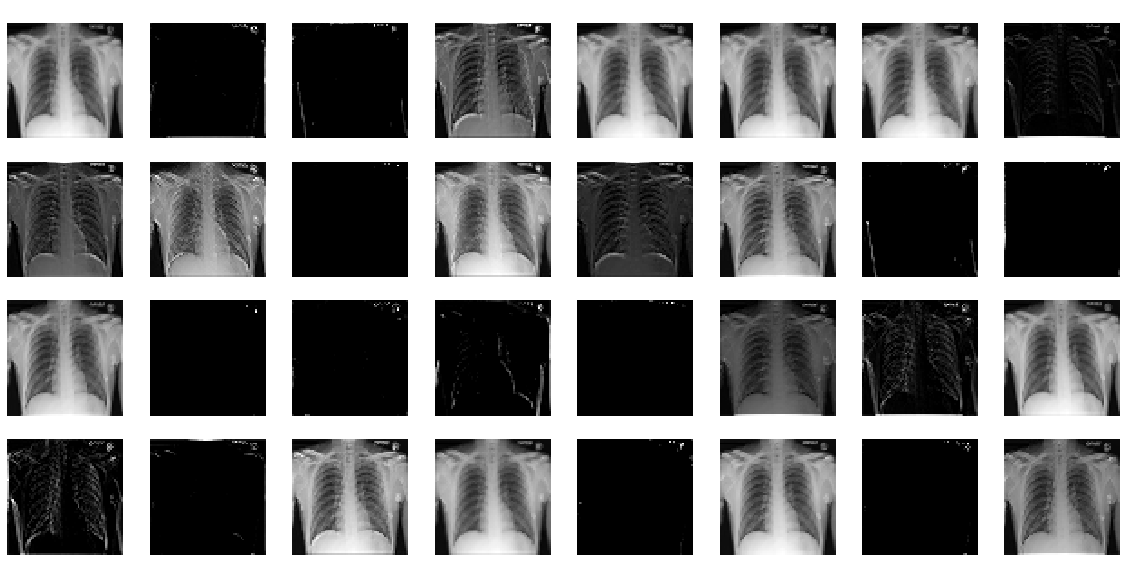

In [0]:
plot_model_filters(model.layers[:2], img)

In [0]:
history = train(model)
plot_accuracy_and_loss(history)

Epoch 1/15


UnboundLocalError: ignored

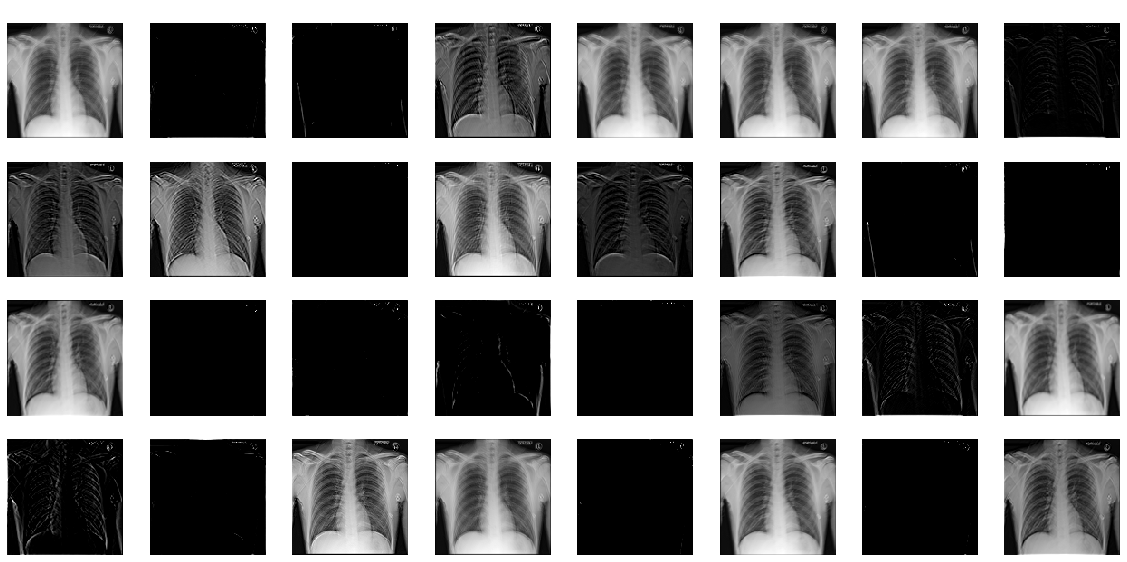

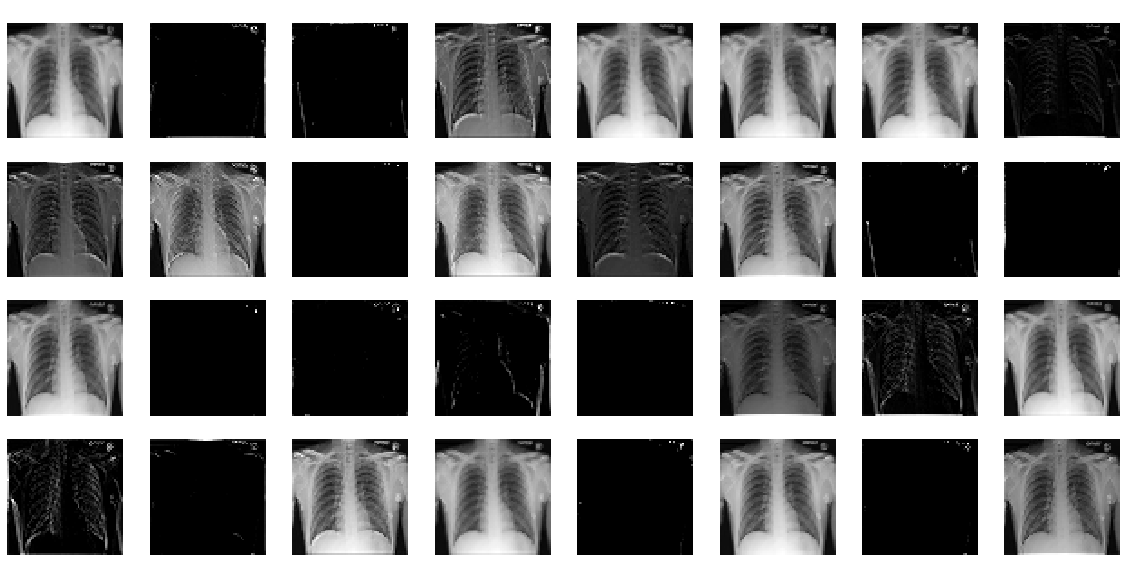

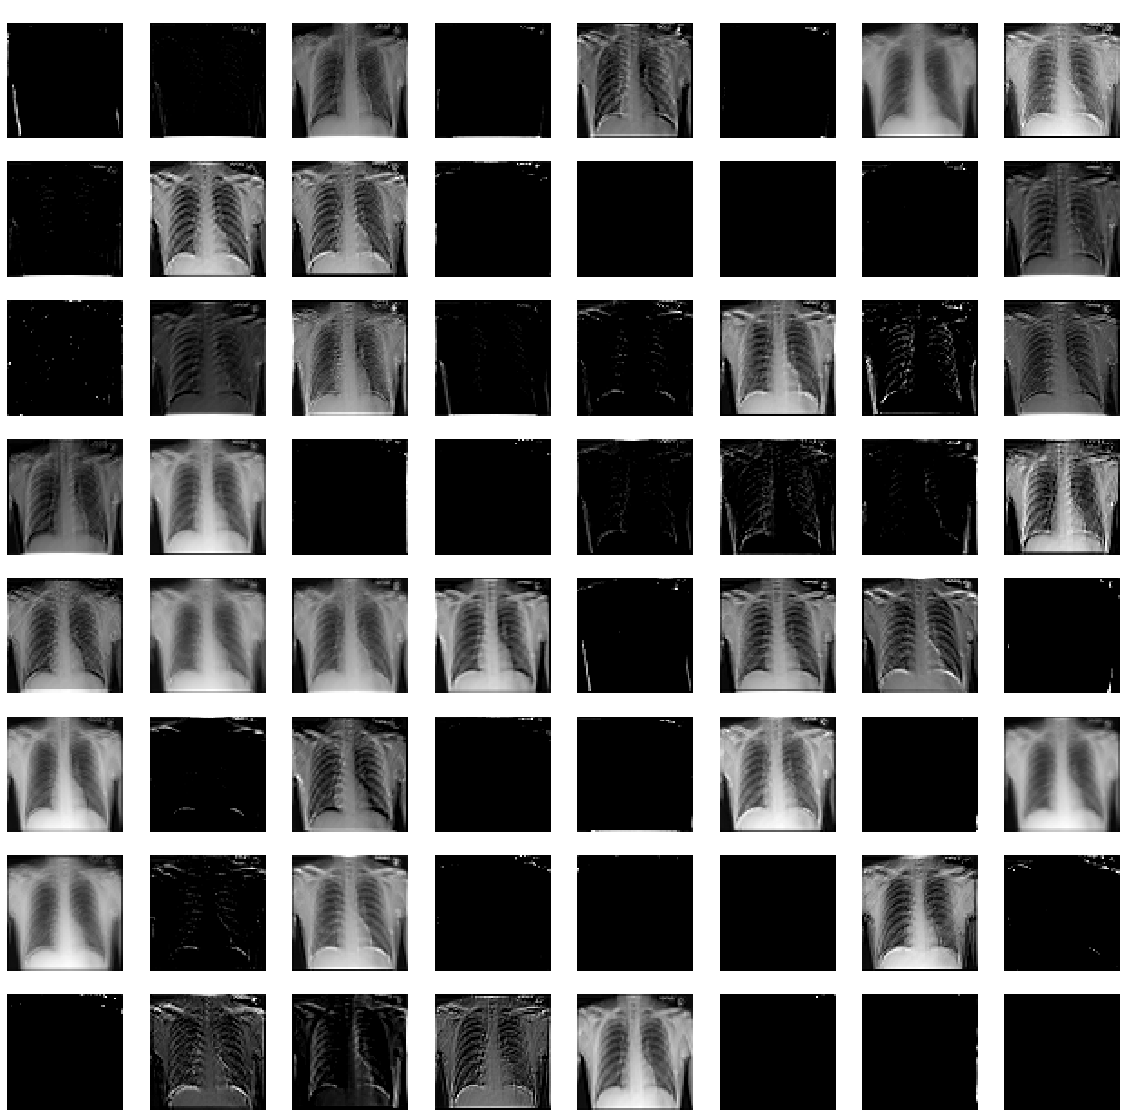

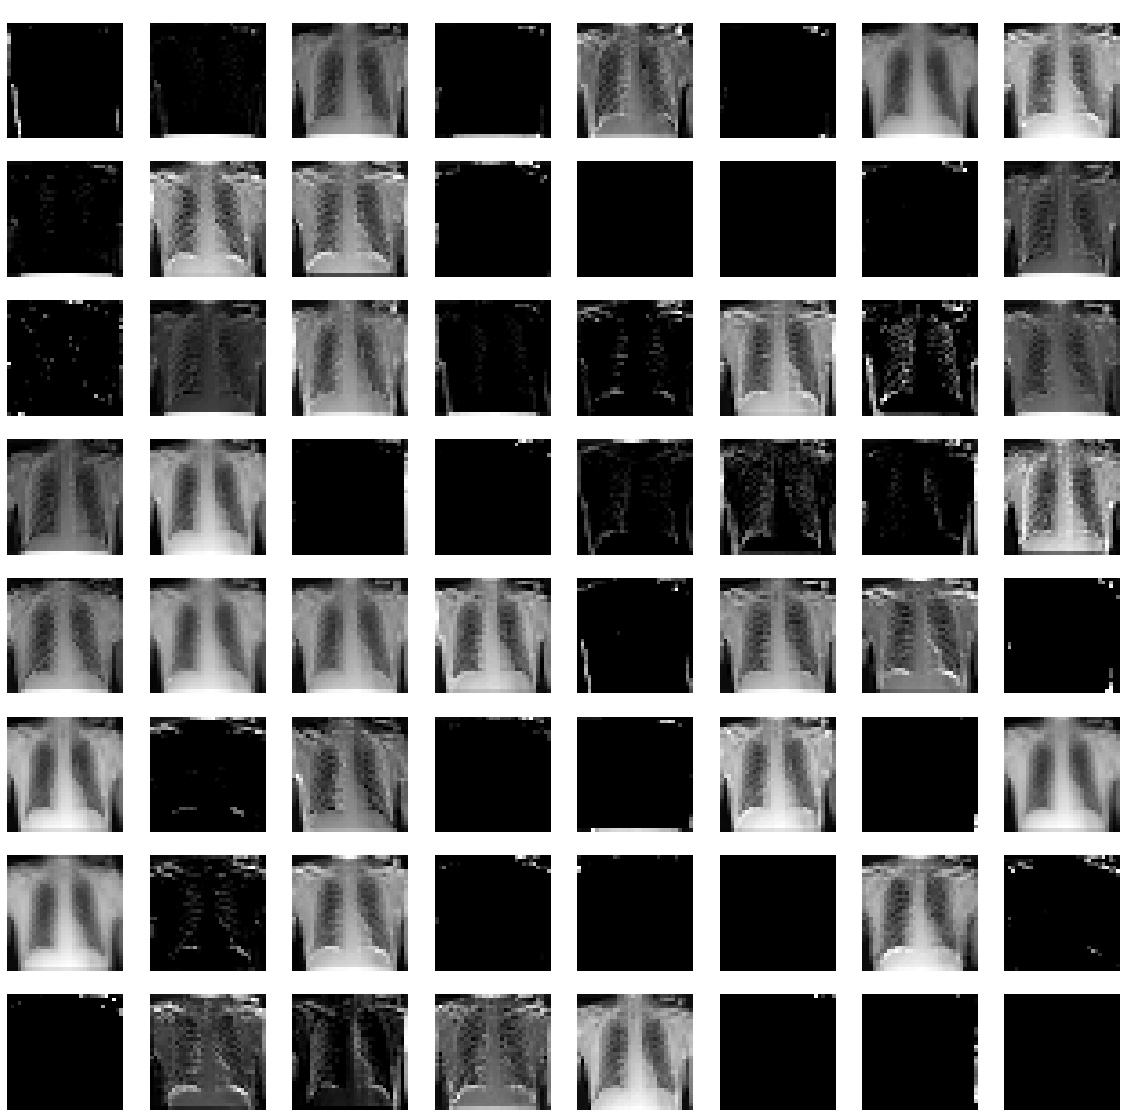

In [0]:
plot_model_filters(model.layers[:4], img)

#Overfitting

##Dropout

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

In [0]:
history = train(model, train_data_gen)


Epoch 1/15


UnboundLocalError: ignored

In [0]:
plot_accuracy_and_loss(history, acc_ylim=[0.5,1.0],loss_ylim=[0.5,0.75])

NameError: ignored

##Data augmentation

Found 100 images belonging to 3 classes.


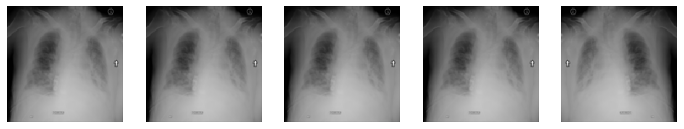

In [0]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 100 images belonging to 3 classes.


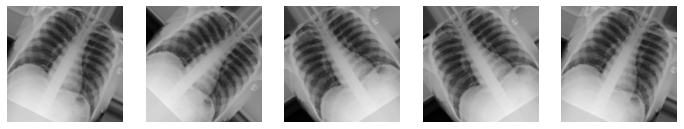

In [0]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 100 images belonging to 3 classes.


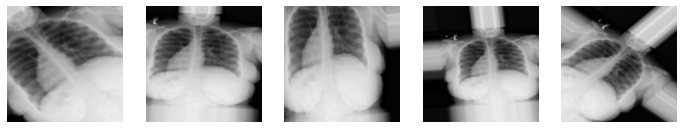

In [0]:
augmented_image_gen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=45,
                                width_shift_range=.15,
                                height_shift_range=.15,
                                horizontal_flip=True,
                                zoom_range=0.5
                                )

augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

In [0]:
model.summary()
history = train(model, augmented_train_data_gen)
plot_accuracy_and_loss(history, acc_ylim=[0.5,0.8],loss_ylim=[0.5,0.75])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

UnboundLocalError: ignored